In [15]:
#Exploratory data analysis for Cohorts of college graduates vs. parents
#Start examiniing and cleaning data; import necessary packages
import pandas as pd
import numpy as np
import os


In [16]:
#Find path
pwd


'/Users/lindalambert/Desktop'

In [17]:
#Import csv file into python and look at first five row of data
path=('/Users/lindalambert/Desktop/mrc_table8.csv')
df = pd.read_csv(path)
df.head()

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,1980,1,1,Ivy Plus,6200.0,106300.0,0.700131,0.096970,0.333333,0.442424,...,0.066667,0.078788,0.157576,0.151515,0.581818,68100.0,83800.0,165.0,17653.0,0.009347
1,1980,1,2,Other elite schools (public and private),6500.0,71800.0,0.670964,0.050000,0.216667,0.324242,...,0.092424,0.107576,0.133333,0.124242,0.493939,56600.0,64600.0,660.0,60703.0,0.010873
2,1980,1,3,Highly selective public,7000.0,63600.0,0.649980,0.032670,0.158381,0.267756,...,0.132812,0.118608,0.117898,0.111506,0.485795,49300.0,55900.0,1408.0,126735.0,0.011110
3,1980,1,4,Highly selective private,6800.0,60300.0,0.625801,0.028302,0.117925,0.233491,...,0.132075,0.120283,0.141509,0.136792,0.478774,48300.0,53700.0,424.0,42920.0,0.009879
4,1980,1,5,Selective public,7200.0,41300.0,0.555779,0.007898,0.052871,0.113826,...,0.208976,0.173295,0.135291,0.124884,0.436629,35100.0,39700.0,10762.0,616241.0,0.017464


In [18]:
#Describe data
df.describe()

,cohort,par_ventile,tier,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,k_q5,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
count,3528.000000,3528.000000,3528.0000,3.519000e+03,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,...,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3513.000000,3519.000000,3.519000e+03,3519.000000
mean,1985.500000,14.714286,7.5000,1.608400e+05,35826.939471,0.561091,0.025247,0.090039,0.156838,0.275540,...,0.190648,0.181639,0.144829,0.129817,0.310508,28896.334186,33125.875320,13809.461211,2.871042e+05,0.049222
std,3.452542,19.671818,4.0317,3.567736e+05,21665.045781,0.100427,0.039453,0.089933,0.122388,0.155734,...,0.056014,0.062910,0.067521,0.062769,0.157847,14705.808070,14970.687931,22741.411443,4.081878e+05,0.040048
min,1980.000000,1.000000,1.0000,1.800000e+03,6200.000000,0.274227,0.000000,0.000000,0.000000,0.033048,...,0.042453,0.033113,0.057141,0.047778,0.006341,300.000000,10000.000000,51.000000,2.906000e+03,0.001247
25%,1982.750000,6.000000,4.0000,2.775000e+04,21500.000000,0.489743,0.003110,0.024399,0.059101,0.147728,...,0.142828,0.127749,0.101151,0.091192,0.181218,17600.000000,21800.000000,1385.000000,4.230900e+04,0.026854
50%,1985.500000,11.000000,7.5000,6.020000e+04,30000.000000,0.551845,0.008544,0.051899,0.111328,0.235370,...,0.200789,0.184057,0.131673,0.116656,0.304621,26000.000000,30200.000000,4304.000000,1.003500e+05,0.047306
75%,1988.250000,16.000000,11.0000,1.065000e+05,42700.000000,0.646868,0.028316,0.135475,0.244348,0.409168,...,0.238059,0.226090,0.165501,0.146459,0.432818,36600.000000,40700.000000,13570.500000,2.547710e+05,0.059455
max,1991.000000,99.000000,14.0000,3.414800e+06,207200.000000,0.789968,0.262852,0.489749,0.588781,0.692873,...,0.321168,0.381818,0.542687,0.533999,0.678007,102200.000000,113700.000000,132032.000000,1.527830e+06,0.416758


In [19]:
#List missing data for first five rows
missing_data = df.isnull()
missing_data.head(5)

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# List data with missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

cohort
False    3528
Name: cohort, dtype: int64

par_ventile
False    3528
Name: par_ventile, dtype: int64

tier
False    3528
Name: tier, dtype: int64

tier_name
False    3528
Name: tier_name, dtype: int64

par_mean
False    3519
True        9
Name: par_mean, dtype: int64

k_mean
False    3519
True        9
Name: k_mean, dtype: int64

k_rank
False    3519
True        9
Name: k_rank, dtype: int64

k_top1pc
False    3519
True        9
Name: k_top1pc, dtype: int64

k_top5pc
False    3519
True        9
Name: k_top5pc, dtype: int64

k_top10pc
False    3519
True        9
Name: k_top10pc, dtype: int64

k_q5
False    3519
True        9
Name: k_q5, dtype: int64

k_q4
False    3519
True        9
Name: k_q4, dtype: int64

k_q3
False    3519
True        9
Name: k_q3, dtype: int64

k_q2
False    3519
True        9
Name: k_q2, dtype: int64

k_q1
False    3519
True        9
Name: k_q1, dtype: int64

k_nowork
False    3519
True        9
Name: k_nowork, dtype: int64

married
False    3519
True        

In [24]:
df.head()

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,1980,1,1,Ivy Plus,6200.0,106300.0,0.700131,0.096970,0.333333,0.442424,...,0.066667,0.078788,0.157576,0.151515,0.581818,68100.0,83800.0,165.0,17653.0,0.009347
1,1980,1,2,Other elite schools (public and private),6500.0,71800.0,0.670964,0.050000,0.216667,0.324242,...,0.092424,0.107576,0.133333,0.124242,0.493939,56600.0,64600.0,660.0,60703.0,0.010873
2,1980,1,3,Highly selective public,7000.0,63600.0,0.649980,0.032670,0.158381,0.267756,...,0.132812,0.118608,0.117898,0.111506,0.485795,49300.0,55900.0,1408.0,126735.0,0.011110
3,1980,1,4,Highly selective private,6800.0,60300.0,0.625801,0.028302,0.117925,0.233491,...,0.132075,0.120283,0.141509,0.136792,0.478774,48300.0,53700.0,424.0,42920.0,0.009879
4,1980,1,5,Selective public,7200.0,41300.0,0.555779,0.007898,0.052871,0.113826,...,0.208976,0.173295,0.135291,0.124884,0.436629,35100.0,39700.0,10762.0,616241.0,0.017464


In [ ]:
#Compute average for all data types with empty sets and replace with means.

In [83]:

avg_par_mean=df['par_mean'].astype('float').mean(axis=0)
print("Average of par_mean:", avg_par_mean)

Average of par_mean: 160839.98294970163


In [101]:

df["par_mean"].replace(np.nan, avg_par_mean)

0          6200.0
1          6500.0
2          7000.0
3          6800.0
4          7200.0
5          7000.0
6          7500.0
7          7000.0
8          7200.0
9          7300.0
10         7400.0
11         7500.0
12         7200.0
13         7000.0
14        13800.0
15        13800.0
16        13900.0
17        13800.0
18        13900.0
19        13900.0
20        13900.0
21        13900.0
22        13800.0
23        13800.0
24        13800.0
25        13800.0
26        13800.0
27        13800.0
28        18300.0
29        18500.0
          ...    
3498     184000.0
3499     183400.0
3500    1546700.0
3501     969400.0
3502     553800.0
3503     813000.0
3504     515000.0
3505     611500.0
3506     505200.0
3507     674000.0
3508     463400.0
3509     579700.0
3510     527500.0
3511     493100.0
3512     529400.0
3513     570000.0
3514    3414800.0
3515    2171700.0
3516    1603000.0
3517    1905500.0
3518    1496500.0
3519    1726900.0
3520    1456300.0
3521    1804700.0
3522    14

In [84]:
avg_k_mean=df['k_mean'].astype('float').mean(axis=0)
print("Average of k_mean:", avg_k_mean)

Average of k_mean: 35826.93947144075


In [102]:
df["k_mean"].replace(np.nan, avg_k_mean)

0       106300.0
1        71800.0
2        63600.0
3        60300.0
4        41300.0
5        43900.0
6        30600.0
7        28900.0
8        27700.0
9        28800.0
10       29600.0
11       18200.0
12       26200.0
13       14000.0
14      108400.0
15       81700.0
16       59000.0
17       60700.0
18       40200.0
19       44500.0
20       30800.0
21       30900.0
22       29700.0
23       30200.0
24       30100.0
25       27100.0
26       27500.0
27       15500.0
28       99500.0
29       75300.0
          ...   
3498     17500.0
3499     14900.0
3500     34900.0
3501     26000.0
3502     22400.0
3503     21100.0
3504     18100.0
3505     17900.0
3506     14200.0
3507     13400.0
3508     14200.0
3509     16700.0
3510     21100.0
3511     14200.0
3512     16300.0
3513     13400.0
3514     34400.0
3515     27000.0
3516     22200.0
3517     20600.0
3518     17900.0
3519     17200.0
3520     15100.0
3521     12800.0
3522     13300.0
3523     14100.0
3524     18600.0
3525     13600

In [86]:
avg_k_rank=df['k_rank'].astype('float').mean(axis=0)
print("Average of k_rank:", avg_k_rank)

Average of k_rank: 0.5610906889462963


In [103]:
df["k_rank"].replace(np.nan, avg_k_rank)

0       0.700131
1       0.670964
2       0.649980
3       0.625801
4       0.555779
5       0.567805
6       0.481619
7       0.448566
8       0.450111
9       0.465387
10      0.467298
11      0.362498
12      0.438044
13      0.301782
14      0.740237
15      0.684766
16      0.638693
17      0.666397
18      0.555290
19      0.575786
20      0.485464
21      0.486394
22      0.461996
23      0.478364
24      0.480855
25      0.432389
26      0.450924
27      0.319694
28      0.707796
29      0.683892
          ...   
3498    0.544961
3499    0.463535
3500    0.676663
3501    0.625555
3502    0.593491
3503    0.590081
3504    0.552184
3505    0.550836
3506    0.494679
3507    0.464316
3508    0.488886
3509    0.530288
3510    0.615715
3511    0.495534
3512    0.510765
3513    0.400503
3514    0.667621
3515    0.623576
3516    0.577081
3517    0.570228
3518    0.527492
3519    0.519979
3520    0.490132
3521    0.438883
3522    0.448069
3523    0.458245
3524    0.541376
3525    0.4628

In [31]:
avg_k_top1pc=df['k_top1pc'].astype('float').mean(axis=0)
print("Average of k_top1pc:", avg_k_top1pc)

Average of k_top1pc: 0.025246771475401355


In [105]:
df["k_top1pc"].replace(np.nan, avg_k_top1pc)

0       0.096970
1       0.050000
2       0.032670
3       0.028302
4       0.007898
5       0.010263
6       0.000748
7       0.008565
8       0.002165
9       0.002073
10      0.001773
11      0.000000
12      0.001764
13      0.000471
14      0.126667
15      0.071856
16      0.033063
17      0.016908
18      0.006201
19      0.008454
20      0.002338
21      0.000000
22      0.001867
23      0.001873
24      0.001855
25      0.006289
26      0.002285
27      0.000433
28      0.107527
29      0.049133
          ...   
3498    0.015947
3499    0.019185
3500    0.176063
3501    0.078786
3502    0.051287
3503    0.033665
3504    0.021526
3505    0.018935
3506    0.009686
3507    0.011909
3508    0.011988
3509    0.015495
3510    0.024917
3511    0.008086
3512    0.023037
3513    0.020265
3514    0.172697
3515    0.088710
3516    0.055582
3517    0.035583
3518    0.029041
3519    0.024779
3520    0.016822
3521    0.015924
3522    0.015967
3523    0.025974
3524    0.019608
3525    0.0188

In [87]:
avg_k_top5pc=df['k_top5pc'].astype('float').mean(axis=0)
print("Average of k_top5pc:", avg_k_top5pc)

Average of k_top5pc: 0.09003886685901619


In [106]:
df["k_top5pc"].replace(np.nan, avg_k_top5pc)

0       0.333333
1       0.216667
2       0.158381
3       0.117925
4       0.052871
5       0.068273
6       0.020568
7       0.027837
8       0.017218
9       0.020041
10      0.024823
11      0.000000
12      0.017586
13      0.004213
14      0.386667
15      0.233533
16      0.140362
17      0.159420
18      0.046834
19      0.066023
20      0.019877
21      0.017778
22      0.017269
23      0.019975
24      0.014842
25      0.018868
26      0.016962
27      0.004815
28      0.301075
29      0.232659
          ...   
3498    0.075089
3499    0.067939
3500    0.327325
3501    0.224324
3502    0.175944
3503    0.152929
3504    0.104612
3505    0.104311
3506    0.050191
3507    0.060267
3508    0.052188
3509    0.068534
3510    0.117940
3511    0.043127
3512    0.080128
3513    0.064492
3514    0.333085
3515    0.234447
3516    0.182458
3517    0.152556
3518    0.112968
3519    0.103622
3520    0.069159
3521    0.052548
3522    0.055729
3523    0.081169
3524    0.147059
3525    0.0754

In [90]:
avg_k_top10pc=df['k_top10pc'].astype('float').mean(axis=0)
print("Average of k_top10pc:", avg_k_top10pc)

Average of k_top10pc: 0.15683778037269633


In [107]:
df["k_top10pc"].replace(np.nan, avg_k_top10pc)

0       0.442424
1       0.324242
2       0.267756
3       0.233491
4       0.113826
5       0.136546
6       0.062827
7       0.057816
8       0.045210
9       0.053905
10      0.060284
11      0.000000
12      0.041733
13      0.012082
14      0.506667
15      0.342814
16      0.243918
17      0.253623
18      0.108845
19      0.140097
20      0.053785
21      0.053333
22      0.045599
23      0.050562
24      0.051948
25      0.050314
26      0.043573
27      0.013516
28      0.435484
29      0.355491
          ...   
3498    0.135625
3499    0.128920
3500    0.422350
3501    0.324413
3502    0.259897
3503    0.246556
3504    0.180569
3505    0.181336
3506    0.097446
3507    0.109708
3508    0.101019
3509    0.147795
3510    0.196013
3511    0.083558
3512    0.142829
3513    0.123807
3514    0.425587
3515    0.335369
3516    0.260319
3517    0.242536
3518    0.185753
3519    0.172934
3520    0.110280
3521    0.101911
3522    0.097996
3523    0.126623
3524    0.235294
3525    0.0943

In [91]:
avg_k_q5=df['k_q5'].astype('float').mean(axis=0)
print("Average of k_q5:", avg_k_q5)

Average of k_q5: 0.2755398171119407


In [38]:
df["k_q5"].replace(np.nan, avg_k_q5)

In [92]:
avg_k_q4=df['k_q4'].astype('float').mean(axis=0)
print("Average of k_q4:", avg_k_q4)

Average of k_q4: 0.20734367447812801


In [40]:
df["k_q4"].replace(np.nan, avg_k_q4)

In [93]:
avg_k_q3=df['k_q3'].astype('float').mean(axis=0)
print("Average of k_q3:", avg_k_q3)

Average of k_q3: 0.1906484859894936


In [42]:
df["k_q3"].replace(np.nan, avg_k_q3)

In [94]:
avg_k_q2=df['k_q2'].astype('float').mean(axis=0)
print("Average of k_q2:", avg_k_q2)

Average of k_q2: 0.18163915940821335


In [95]:
df["k_q2"].replace(np.nan, avg_k_q2)

In [96]:
avg_k_q1=df['k_q1'].astype('float').mean(axis=0)
print("Average of k_q1:", avg_k_q1)

Average of k_q1: 0.14482886338601905


In [97]:
df["k_q1"].replace(np.nan, avg_k_q1)

In [98]:
avg_k_nowork=df['k_nowork'].astype('float').mean(axis=0)
print("Average of k_nowork:", avg_k_nowork)

Average of k_nowork: 0.12981666184316754


In [49]:
df["k_nowork"].replace(np.nan, avg_k_nowork)

In [50]:
avg_married=df['married'].astype('float').mean(axis=0)
print("Average of married:", avg_married)

Average of married: 0.31050774768899875


In [51]:
df["married"].replace(np.nan, avg_married)

In [77]:
avg_k_median=df['k_median'].astype('float').mean(axis=0)
print("Average of k_median:", avg_k_median)

Average of k_median: 28896.334185848253


In [76]:
df["k_median"].replace(np.nan, avg_k_median)

In [54]:
avg_k_median_nozero=df['k_median_nozero'].astype('float').mean(axis=0)
print("Average of k_median_nozero:", avg_k_median_nozero)

Average of k_median_nozero: 33125.87532023911


In [55]:
df["k_median_nozero"].replace(np.nan, avg_k_median_nozero)

In [57]:
avg_count=df['count'].astype('float').mean(axis=0)
print("Average of count:", avg_count)

Average of count: 13809.461210571186


In [78]:
df["count"].replace(np.nan, avg_count)

In [79]:
avg_tot_count=df['tot_count'].astype('float').mean(axis=0)
print("Average of tot_count:", avg_tot_count)

Average of tot_count: 287104.16084114806


In [80]:
df["tot_count"].replace(np.nan, avg_tot_count)

In [81]:
avg_density=df['density'].astype('float').mean(axis=0)
print("Average of density:", avg_density)

Average of density: 0.04922234218375757


In [108]:
df["density"].replace(np.nan, avg_density)

0       0.009347
1       0.010873
2       0.011110
3       0.009879
4       0.017464
5       0.015016
6       0.034561
7       0.026036
8       0.032324
9       0.043875
10      0.053288
11      0.057467
12      0.046088
13      0.086378
14      0.008497
15      0.011004
16      0.012648
17      0.009646
18      0.019888
19      0.016645
20      0.044216
21      0.025088
22      0.034867
23      0.048575
24      0.050926
25      0.054714
26      0.050031
27      0.082028
28      0.010536
29      0.011400
          ...   
3498    0.029074
3499    0.012418
3500    0.396989
3501    0.370159
3502    0.158727
3503    0.304552
3504    0.088054
3505    0.112784
3506    0.028961
3507    0.069078
3508    0.023937
3509    0.014082
3510    0.008194
3511    0.012718
3512    0.022470
3513    0.008850
3514    0.153472
3515    0.123543
3516    0.026929
3517    0.089209
3518    0.013800
3519    0.022008
3520    0.004548
3521    0.015655
3522    0.003055
3523    0.002585
3524    0.001388
3525    0.0018

In [64]:
%%capture
! pip install seaborn

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [66]:
# list the data types for each column
print(df.dtypes)

cohort               int64
par_ventile          int64
tier                 int64
tier_name           object
par_mean           float64
k_mean             float64
k_rank             float64
k_top1pc           float64
k_top5pc           float64
k_top10pc          float64
k_q5               float64
k_q4               float64
k_q3               float64
k_q2               float64
k_q1               float64
k_nowork           float64
married            float64
k_median           float64
k_median_nozero    float64
count              float64
tot_count          float64
density            float64
dtype: object


In [67]:
df.corr()

,cohort,par_ventile,tier,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,k_q5,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
cohort,1.000000e+00,-3.322151e-18,0.000000e+00,0.033649,-0.492868,-0.075099,-0.030171,-0.057737,-0.070612,-0.089114,...,0.099685,0.212760,-0.052085,-0.045407,-0.861890,-0.538114,-0.591781,0.051117,0.059265,-0.002105
par_ventile,-3.322151e-18,1.000000e+00,-1.950802e-17,0.907955,0.164271,0.127967,0.216309,0.222762,0.216328,0.199527,...,-0.298901,-0.149302,0.049181,0.054249,0.096810,0.104366,0.156585,-0.096305,0.007439,0.007031
tier,0.000000e+00,-1.950802e-17,1.000000e+00,-0.042711,-0.642576,-0.849153,-0.668693,-0.789191,-0.824357,-0.838341,...,0.667888,0.723747,0.666850,0.639941,-0.056010,-0.684837,-0.633251,0.322240,0.381049,-0.037978
par_mean,3.364938e-02,9.079553e-01,-4.271087e-02,1.000000,0.173337,0.115122,0.292304,0.269733,0.246985,0.209170,...,-0.319378,-0.120360,0.085755,0.091320,0.027444,0.097478,0.156319,-0.095281,-0.013518,0.168235
k_mean,-4.928682e-01,1.642707e-01,-6.425757e-01,0.173337,1.000000,0.759124,0.769326,0.827082,0.824098,0.811117,...,-0.726404,-0.759897,-0.421510,-0.400298,0.537008,0.949039,0.963975,-0.250546,-0.283347,0.136615
k_rank,-7.509922e-02,1.279670e-01,-8.491533e-01,0.115122,0.759124,1.000000,0.674052,0.835877,0.901144,0.956792,...,-0.761551,-0.905908,-0.802212,-0.773214,0.240923,0.838886,0.774979,-0.361578,-0.405274,0.099929
k_top1pc,-3.017145e-02,2.163087e-01,-6.686926e-01,0.292304,0.769326,0.674052,1.000000,0.939406,0.874747,0.788958,...,-0.748069,-0.594082,-0.301699,-0.276163,0.007670,0.657985,0.680671,-0.224757,-0.260166,0.201477
k_top5pc,-5.773684e-02,2.227617e-01,-7.891910e-01,0.269733,0.827082,0.835877,0.939406,1.000000,0.983429,0.935683,...,-0.875848,-0.755437,-0.443561,-0.411935,0.080246,0.776075,0.781603,-0.259968,-0.303770,0.165523
k_top10pc,-7.061197e-02,2.163283e-01,-8.243571e-01,0.246985,0.824098,0.901144,0.874747,0.983429,1.000000,0.980300,...,-0.906031,-0.828668,-0.520487,-0.486716,0.126157,0.811763,0.804788,-0.271912,-0.315003,0.142041
k_q5,-8.911424e-02,1.995269e-01,-8.383414e-01,0.209170,0.811117,0.956792,0.788958,0.935683,0.980300,1.000000,...,-0.898382,-0.897618,-0.612777,-0.577920,0.192618,0.840763,0.816523,-0.285337,-0.325740,0.113421


In [68]:
import pandas as pd
import numpy as np

df[['par_ventile', 'tier', 'par_mean', 'k_mean', 'k_top1pc','k_top5pc','k_top10pc']].corr()


,par_ventile,tier,par_mean,k_mean,k_top1pc,k_top5pc,k_top10pc
par_ventile,1.000000e+00,-1.950802e-17,0.907955,0.164271,0.216309,0.222762,0.216328
tier,-1.950802e-17,1.000000e+00,-0.042711,-0.642576,-0.668693,-0.789191,-0.824357
par_mean,9.079553e-01,-4.271087e-02,1.000000,0.173337,0.292304,0.269733,0.246985
k_mean,1.642707e-01,-6.425757e-01,0.173337,1.000000,0.769326,0.827082,0.824098
k_top1pc,2.163087e-01,-6.686926e-01,0.292304,0.769326,1.000000,0.939406,0.874747
k_top5pc,2.227617e-01,-7.891910e-01,0.269733,0.827082,0.939406,1.000000,0.983429
k_top10pc,2.163283e-01,-8.243571e-01,0.246985,0.824098,0.874747,0.983429,1.000000


(0, 217309.810425994)

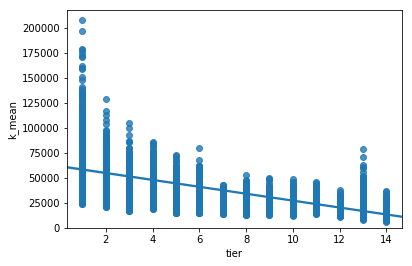

In [69]:
# Tier as potential predictor variable of kids mean income
sns.regplot(x="tier", y="k_mean", data=df)
plt.ylim(0,)

(0, 217309.810425994)

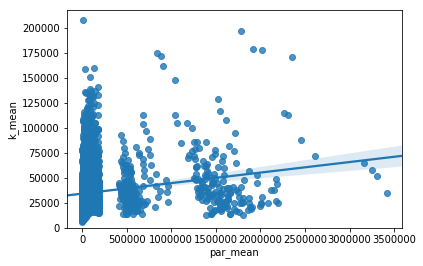

In [70]:
# Parents mean income as potential predictor variable of kids mean income
sns.regplot(x="par_mean", y="k_mean", data=df)
plt.ylim(0,)

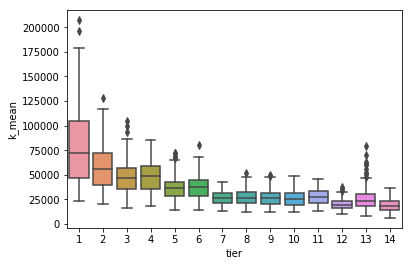

In [72]:
#Tier of college comparied to kids mean income
sns.boxplot(x="tier", y="k_mean", data=df)

In [73]:
from scipy import stats 

In [104]:
pearson_coef, p_value = stats.pearsonr(df['par_mean'], df['k_mean'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.17333673208034112  with a P-value of P = 3.373225035911398e-25


In [110]:
pearson_coef, p_value = stats.pearsonr(df['tier'], df['k_mean'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.641685967948407  with a P-value of P = 0.0


In [111]:
#Regression modeling
from sklearn.linear_model import LinearRegression

In [112]:
#Linear regression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
X = df[['tier']]
Y = df['k_mean']

In [114]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
Yhat=lm.predict(X)

In [116]:
lm.intercept_

61655.5095616842

In [117]:
lm.coef_

array([-3443.80934537])

In [123]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 3585557.4041828746)

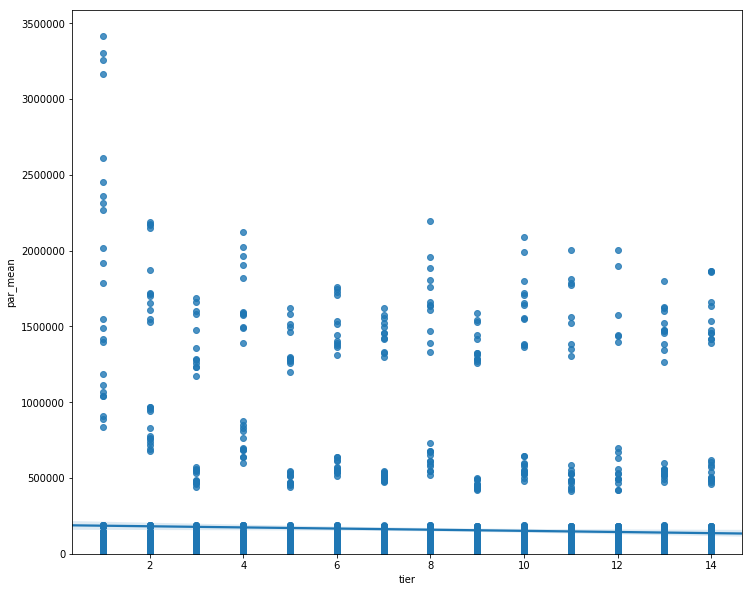

In [124]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="tier", y="par_mean", data=df)
plt.ylim(0,)

In [119]:
#Multiple regression
Z = df[['tier','par_mean']]

In [120]:
lm.fit(Z, df['k_mean'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
lm.intercept_

59976.274574780946

In [122]:
lm.coef_

array([-3.41029800e+03,  8.87776721e-03])

In [126]:
# Fit the model 
lm.fit(Z, df['k_mean'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['k_mean']))

The R-square is:  0.43309529720994056


In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
Y_predict_multifit = lm.predict(Z)

In [159]:
print('The mean square error of k_mean and predicted value using multifit is: ', \
      mean_squared_error(df['k_mean'], Y_predict_multifit))

The mean square error of k_mean and predicted value using multifit is:  265336221.6484108


In [151]:
df.loc[: , "cohort"]

0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1980
9       1980
10      1980
11      1980
12      1980
13      1980
14      1980
15      1980
16      1980
17      1980
18      1980
19      1980
20      1980
21      1980
22      1980
23      1980
24      1980
25      1980
26      1980
27      1980
28      1980
29      1980
        ... 
3498    1991
3499    1991
3500    1991
3501    1991
3502    1991
3503    1991
3504    1991
3505    1991
3506    1991
3507    1991
3508    1991
3509    1991
3510    1991
3511    1991
3512    1991
3513    1991
3514    1991
3515    1991
3516    1991
3517    1991
3518    1991
3519    1991
3520    1991
3521    1991
3522    1991
3523    1991
3524    1991
3525    1991
3526    1991
3527    1991
Name: cohort, Length: 3528, dtype: int64

(0, 217309.810425994)

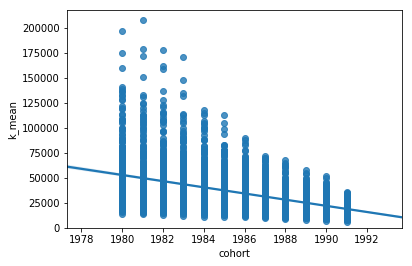

In [152]:
# Cohort as potential predictor variable of kids mean income
sns.regplot(x="cohort", y="k_mean", data=df)
plt.ylim(0,)

In [153]:
pearson_coef, p_value = stats.pearsonr(df['cohort'], df['k_mean'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.49207903266676367  with a P-value of P = 1.4107096790998975e-214


In [154]:
#Multiple regression with three variables

B = df[['tier','cohort','par_mean']]

In [155]:
lm.fit(B, df['k_mean'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
lm.intercept_

6251109.931983379

In [157]:
lm.coef_

array([-3.40645321e+03, -3.11827062e+03,  9.89632311e-03])

In [158]:
# Fit the model 
lm.fit(B, df['k_mean'])
# Find the R^2
print('The R-square is: ', lm.score(B, df['k_mean']))

The R-square is:  0.6803832703791385


In [160]:
Y_predict_multifit = lm.predict(B)

In [161]:
print('The mean square error of k_mean and predicted value using multifit is: ', \
      mean_squared_error(df['k_mean'], Y_predict_multifit))

The mean square error of k_mean and predicted value using multifit is:  149594623.21593592
